In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns

In [2]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

In [3]:
movies = movies.drop('genres', axis=1)
movies

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017)
9738,193583,No Game No Life: Zero (2017)
9739,193585,Flint (2017)
9740,193587,Bungo Stray Dogs: Dead Apple (2018)


In [4]:
df = pd.merge(movies,ratings, on='movieId')

In [5]:
df['movieId'].unique()

array([     1,      2,      3, ..., 193585, 193587, 193609], dtype=int64)

In [6]:
n_users = df.userId.nunique()
n_items = df.movieId.nunique()

In [15]:
from sklearn.model_selection import train_test_split
print(n_users, n_items)
index[index[0]==7].index[0]

610 9724


6

In [9]:
index = pd.DataFrame(data=df['movieId'].unique()).reset_index()

In [16]:
train_data, test_data = train_test_split(df,test_size = 0.3 )
def ubah(x):
    return index[index[0]==x].index[0]
print(n_users , n_items)
df['movieId_index'] = df['movieId'].apply(lambda x : ubah(x))

610 9724


In [17]:
df

,movieId,title,userId,rating,timestamp,movieId_index
0,1,Toy Story (1995),1,4.0,964982703,0
1,1,Toy Story (1995),5,4.0,847434962,0
2,1,Toy Story (1995),7,4.5,1106635946,0
3,1,Toy Story (1995),15,2.5,1510577970,0
4,1,Toy Story (1995),17,4.5,1305696483,0
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),184,4.0,1537109082,9719
100832,193583,No Game No Life: Zero (2017),184,3.5,1537109545,9720
100833,193585,Flint (2017),184,3.5,1537109805,9721
100834,193587,Bungo Stray Dogs: Dead Apple (2018),184,3.5,1537110021,9722


In [19]:
train_data_matrix = np.zeros((n_users, n_items))
for line in train_data.itertuples():
    train_data_matrix[line[3]-1, line[6]-1] = line[4]  


In [21]:
test_data_matrix = np.zeros((n_users, n_items))
for line in test_data.itertuples():
    test_data_matrix[line[3]-1, line[6]-1] = line[4]

In [29]:
from sklearn.metrics.pairwise import pairwise_distances
user_similarity = pairwise_distances(train_data_matrix,metric='cosine')
item_similarity = pairwise_distances(train_data_matrix.T,metric='cosine')

In [34]:
train_data_matrix - train_data_matrix.mean(axis=1)[:,np.newaxis]

array([[-0.07332374, -0.07332374, -0.07332374, ..., -0.07332374,
        -0.07332374,  3.92667626],
       [-0.00997532, -0.00997532, -0.00997532, ..., -0.00997532,
        -0.00997532, -0.00997532],
       [-0.00771288, -0.00771288, -0.00771288, ..., -0.00771288,
        -0.00771288, -0.00771288],
       ...,
       [ 1.81067462, -0.18932538, -0.18932538, ..., -0.18932538,
        -0.18932538, -0.18932538],
       [-0.00853558, -0.00853558, -0.00853558, ..., -0.00853558,
        -0.00853558,  2.99146442],
       [-0.3463081 , -0.3463081 , -0.3463081 , ..., -0.3463081 ,
        -0.3463081 ,  4.6536919 ]])

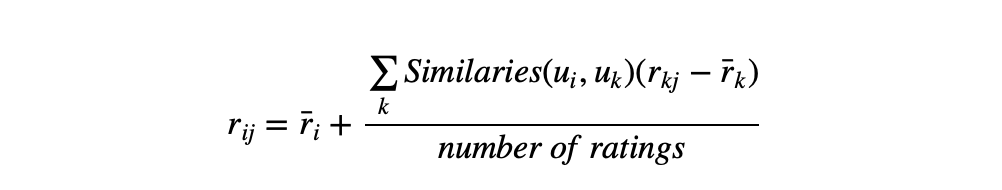

In [114]:
mean = train_data_matrix.mean(axis=1)
ratings_diff = (train_data_matrix - mean[:, np.newaxis]) 
print(ratings_diff.shape,user_similarity.shape, user_similarity.dot(ratings_diff).shape
      ,np.array([np.abs(user_similarity).sum(axis=1)]).shape)
mean[:, np.newaxis]+ user_similarity.dot(ratings_diff)/ np.array([np.abs(user_similarity).sum(axis=1)]).T
#np.array([np.abs(similarity).sum(axis=1)]).T


(610, 9724) (610, 610) (610, 9724) (1, 610)


array([[ 0.46598915,  0.2009478 ,  0.05342842, ...,  0.03989685,
         0.03353193,  1.07533267],
       [ 0.41532308,  0.14441671, -0.01092174, ..., -0.02587618,
        -0.03131968,  1.05301158],
       [ 0.41151856,  0.13674598, -0.01408304, ..., -0.02802478,
        -0.0338066 ,  1.04678479],
       ...,
       [ 0.56604467,  0.31640725,  0.17160786, ...,  0.1576031 ,
         0.15118816,  1.18597644],
       [ 0.3954613 ,  0.13465279, -0.01499645, ..., -0.02733314,
        -0.03356839,  1.02129839],
       [ 0.73845745,  0.48185889,  0.32878752, ...,  0.31369678,
         0.30788563,  1.35242113]])

In [133]:
def predict_user(rating, similarity):
    mean_user_rating = rating.mean(axis=1)
    #You use np.newaxis so that mean_user_rating has same format as ratings
    ratings_diff = (rating - mean_user_rating[:, np.newaxis]) 
    pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([(similarity).sum(axis=1)]).T
    return pred

def predict_item (rating,similarity):
    pred = rating.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)]) 
    return pred

In [134]:
user_pred = predict_user(train_data_matrix,user_similarity)
item_pred = predict_item(train_data_matrix,item_similarity)

In [135]:
user_pred

array([[ 0.46598915,  0.2009478 ,  0.05342842, ...,  0.03989685,
         0.03353193,  1.07533267],
       [ 0.41532308,  0.14441671, -0.01092174, ..., -0.02587618,
        -0.03131968,  1.05301158],
       [ 0.41151856,  0.13674598, -0.01408304, ..., -0.02802478,
        -0.0338066 ,  1.04678479],
       ...,
       [ 0.56604467,  0.31640725,  0.17160786, ...,  0.1576031 ,
         0.15118816,  1.18597644],
       [ 0.3954613 ,  0.13465279, -0.01499645, ..., -0.02733314,
        -0.03356839,  1.02129839],
       [ 0.73845745,  0.48185889,  0.32878752, ...,  0.31369678,
         0.30788563,  1.35242113]])

In [136]:
item_pred

array([[0.06489682, 0.06801808, 0.07257978, ..., 0.07371018, 0.07333128,
        0.06023357],
       [0.0091968 , 0.00989841, 0.01003742, ..., 0.00978632, 0.00997634,
        0.00905412],
       [0.00779907, 0.00762929, 0.0077447 , ..., 0.00775353, 0.00771367,
        0.00772537],
       ...,
       [0.16674412, 0.17718559, 0.1884495 , ..., 0.19002116, 0.18934485,
        0.16404652],
       [0.00714334, 0.00764629, 0.00816026, ..., 0.00858057, 0.00853646,
        0.00677929],
       [0.33120193, 0.3436643 , 0.34791535, ..., 0.34608291, 0.34634372,
        0.31562251]])

In [137]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten() 
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

In [138]:
print('User-based CF RMSE: ' + str(rmse(user_pred, test_data_matrix)))
print('Item-based CF RMSE: ' + str(rmse(item_pred, test_data_matrix)))

User-based CF RMSE: 3.329865386161258
Item-based CF RMSE: 3.534358865228594
